In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import time
import math
from talib import abstract
import concurrent.futures
import matplotlib.pyplot as plt
from rotation import initialize_indicators

os.chdir(r'C:\Users\jy\Desktop')

prices_df = pd.read_csv('stock_prices_xkls_all_file-1.csv', dtype={'TICKER': str})

prices_df = prices_df[['TICKER', 'DATE', 'ADJ_OPEN', 'ADJ_HIGH', 'ADJ_LOW', 'ADJ_CLOSE', 'ADJ_VOLUME','ADJ_FACTOR',
       'EX_DIVIDEND', 'SPLIT_RATIO', 'PERCENT_CHANGE']]
prices_df.columns = ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume', 'adj_factor', 'ex_dividend', 'split_ratio', 'pct_change']
prices_df['date'] = pd.to_datetime(prices_df['date'])

tickers = np.unique(prices_df['ticker'])
dates = np.unique(prices_df['date'])
dates = pd.to_datetime(dates).sort_values()

date_df = pd.DataFrame({'date':dates})
date_df = date_df.sort_values(by = 'date')


prices = {}
for t in tickers:
    temp = prices_df[prices_df['ticker'] == t].sort_values(by = 'date')
    price_df = pd.merge(date_df, temp, how = 'outer', on = 'date')
    price_df['volume'] = price_df['volume'].fillna(0)
    price_df['close'] = price_df['close'].fillna(method='ffill')
    
    # To cater for the mising OHL row
    price_df['open'] = price_df['open'].fillna(price_df['close'])
    price_df['high'] = price_df['high'].fillna(price_df['close'])
    price_df['low'] = price_df['low'].fillna(price_df['close'])
    prices[t] = price_df.copy()
    prices[t] = prices[t].set_index('date').sort_index()
    
dff = pd.concat([prices[t] for t in tickers])
dff['tradable'] = dff['close'] != 0


C:\Users\jy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:

# ###
# ###
# ###
temp_date_df = date_df['date'].groupby(date_df['date'].astype(str).str[:8]).first().to_frame()
temp_date_df['date'] = pd.to_datetime(temp_date_df['date'])
temp_date_df.head()

order_dates = [x for x in temp_date_df['date']]
order_dates[:5]

# start = time.time()

# d = {}
# print(f'Total Tickers: {len(tickers)}')
# count = 1
# for s in tickers:
#     d[s] = initialize_indicators(prices[s])
#     count = count + 1
#     print(f'Current Count: {count}')
    
# end = time.time()
# print(end-start)



[Timestamp('2007-01-03 00:00:00'),
 Timestamp('2007-02-02 00:00:00'),
 Timestamp('2007-03-01 00:00:00'),
 Timestamp('2007-04-02 00:00:00'),
 Timestamp('2007-05-03 00:00:00')]

In [ ]:

# s = '6939'
# z = d[s]
# print(len(z[pd.isna(z['ticker'])]))
# z['ticker'] = z['ticker'].fillna(s)
# print(len(z[pd.isna(z['ticker'])]))


# for s in d:
#     d[s]['ticker'] = d[s]['ticker'].fillna(s)


# df5 = pd.concat([d[s] for s in d])
# df5.to_csv('full_klse_raw.csv')



In [15]:
df5 = pd.read_csv("df5.csv")


In [17]:

df5["date"] = pd.to_datetime(df5["date"])
df5 = df5.set_index("date")

In [18]:
df5.head()
# df5

,ticker,open,high,low,close,volume,adj_factor,ex_dividend,split_ratio,pct_change,...,adj_slope255,adj_slope260,adj_slope265,adj_slope270,adj_slope275,adj_slope280,adj_slope285,adj_slope290,adj_slope295,adj_slope300
date,,,,,,,,,,,,,,,,,,,,,
2020-07-30,0001,1.62,1.660,1.53,1.58,4539800.0,1.0,0.0,1.0,-0.0063,...,3.692345,3.479606,3.208221,2.851469,2.365356,1.869264,1.236849,0.912669,0.773250,0.624188
2020-07-30,0002,3.24,3.300,3.11,3.13,126600.0,1.0,0.0,1.0,-0.0340,...,46.217823,44.268947,42.715751,41.992836,41.373026,40.592102,39.782937,39.145725,39.085174,38.721822
2020-07-30,0003,0.02,0.020,0.02,0.02,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-07-30,0005,0.17,0.175,0.16,0.16,35003000.0,1.0,0.0,1.0,-0.0303,...,-1.136188,-1.846478,-2.640969,-3.491003,-4.267786,-5.079257,-5.787102,-6.408939,-7.006899,-7.762071
2020-07-30,0006,0.26,0.260,0.26,0.26,10000.0,1.0,0.0,1.0,-0.2353,...,-6.555119,-6.530087,-6.117731,-5.634094,-4.636013,-3.647654,-3.397243,-3.031371,-2.833827,-2.652387


2007-02-02 00:00:00 | 100000.0
2007-03-01 00:00:00 | 102559.03598059034
2007-04-02 00:00:00 | 110095.19400663041
2007-05-03 00:00:00 | 106604.5363220541
2007-06-01 00:00:00 | 113899.10493385645
2007-07-02 00:00:00 | 124427.23894719004
2007-08-01 00:00:00 | 117213.72941776527
2007-09-03 00:00:00 | 117783.25601872553
2007-10-01 00:00:00 | 122892.82968724059
2007-11-01 00:00:00 | 115296.69383932835
2007-12-03 00:00:00 | 121742.5480061393
2008-01-02 00:00:00 | 111580.67700570532
2008-02-04 00:00:00 | 107409.94447349594
2008-03-03 00:00:00 | 99747.94943148817
2008-04-01 00:00:00 | 99902.84202867799
2008-05-02 00:00:00 | 100159.31807058527
2008-06-02 00:00:00 | 93311.90605400984
2008-07-01 00:00:00 | 86963.99661324514
2008-08-01 00:00:00 | 84466.83262294404
2008-09-02 00:00:00 | 79606.33818256456
2008-10-03 00:00:00 | 77667.34929355604
2008-11-03 00:00:00 | 77520.50227173016
2008-12-01 00:00:00 | 78754.70393721478
2009-01-02 00:00:00 | 76227.35645785328
2009-02-03 00:00:00 | 75824.5561138608

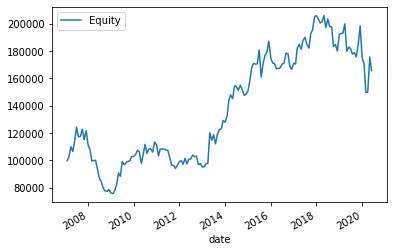

In [26]:


param = [30,60]
top = 30
min_slope = 20
risk_factor = 0.001
initial_capital = 100000
fees_in_decimal = 0.004

target_dicts = []
equity_list = []
cash_list = []
cost_list = []
eod_values = []

orders = []


plot_dates = []
plot_equities = []

eval_date = [dates[np.nonzero(dates == x)[0][0] - 1] for x in order_dates]

first_eval_date_index = math.ceil(max(param)/30)
for i in range(len(order_dates)):
# for i in range(15):
    # i=4
    if i < first_eval_date_index:
        target_dicts.append({})
        equity_list.append(0)
        cash_list.append(initial_capital)
        cost_list.append(0)
        eod_values.append(initial_capital)
        continue
        
    # eval_date = order_date - 1
    eval_df = df5.loc[eval_date[i]].copy()
    
    # Filtering Logic
    
    
                    
    # Position Sizing
    # Exclude the condition to restrict the top N for position sizing, do position sizing for all stocks
    order_df = df5.loc[order_dates[i]].copy()
    
    sell_df = pd.DataFrame(target_dicts[i-1].items(), columns=['ticker', 'quantity_on_hand']).set_index('ticker')
    merged_sell_df = pd.merge(order_df, sell_df, left_on='ticker', right_index=True)[['ticker','open','quantity_on_hand']]
    merged_sell_df = merged_sell_df.assign(market_value=merged_sell_df['quantity_on_hand']*merged_sell_df['open']*(1-fees_in_decimal))
    merged_sell_df = merged_sell_df.assign(remark=f'{i} | sell')
    sell_records = merged_sell_df[['ticker', 'quantity_on_hand', 'open', 'remark']].copy()
    sell_records.columns = ['ticker', 'quantity', 'price', 'remark']
    sell_records['quantity'] = -sell_records['quantity']
    orders.append(sell_records)
    
    market_value_upon_selling1 = np.sum(merged_sell_df['market_value'])
    
    market_value_upon_selling = np.sum([order_df[order_df['ticker']==stock]['open'].values[0]*target_dicts[i-1][stock]*(1-fees_in_decimal) if order_df[order_df['ticker']==stock].empty == False else 0 for stock in target_dicts[i-1]])
    
    
    equity_list.append(market_value_upon_selling)
    current_portfolio_value = market_value_upon_selling + cash_list[i-1]
    
    
    eligible = eval_df[eval_df['ATR20']>0.0001]
    eligible = eligible[eligible['close']>1.0]
    eligible = eligible[eligible['volume'] != 0]
    eligible = eligible[['ticker','close','ATR20','Inv_Vol']]
    eligible = eligible.assign(ToBuy=np.floor(current_portfolio_value*risk_factor/(100*eligible['ATR20']))*100)
    eligible['ToBuy'] = eligible['ToBuy'].astype(int)
    
    
    
    # target_proportion = eligible.set_index('ticker')['Proportion']
    target_proportion = eligible.set_index('ticker')['ToBuy']
    
    order_df = df5.loc[order_dates[i]].copy()
    order_df = pd.merge(order_df, target_proportion, left_on='ticker', right_index=True)
    order_df = order_df.assign(avg_slope = 0.5*(order_df[f'adj_slope{param[0]}'] + order_df[f'adj_slope{param[1]}']))
    order_df = order_df.assign(rank = order_df['avg_slope'].rank(method = 'first', ascending = False))
    order_df = order_df[(order_df['avg_slope']>min_slope)].sort_values(by = 'rank')
    
    # To include: eval_df['rank']<=top
    
    order_df = order_df.assign(Cost = order_df['ToBuy']*order_df['open'])
#     order_df["c2"] = (order_df["close"] + order_df["high"])/2
#     order_df = order_df.assign(Cost = order_df['ToBuy']*order_df['c2'])
    order_df = order_df.assign(CumulativeCost = order_df['Cost'].cumsum())
    order_df = order_df[order_df['CumulativeCost']<=market_value_upon_selling+cash_list[i-1]]
    order_df = order_df.assign(remark=f'{i} | buy')
#     buy_record = order_df[['ticker', 'ToBuy', 'c2', 'remark']].copy()
    buy_record = order_df[['ticker', 'ToBuy', 'open', 'remark']].copy()
    buy_record.columns = ['ticker', 'quantity', 'price', 'remark']
    
    # if i != range(len(order_dates)-1):
    orders.append(buy_record)
    # print(order_df)
    
    target_dict = order_df.set_index('ticker')['ToBuy'].to_dict()
    target_dict = {k:v for k,v in target_dict.items() if v != 0}
    
    
    total_cost = order_df['CumulativeCost'].max() if order_df.empty == False else 0.0
    cash = market_value_upon_selling + cash_list[i-1] - total_cost
    order_df = order_df.assign(Eod_value = order_df['ToBuy']*order_df['close'])
    eod_market_value = order_df['Eod_value'].sum()
    
    
    # print(i)
    # print(target_dict)
    # print(market_value_upon_selling)
    # print(cash)
    # print(total_cost)
    # print(eod_market_value)
    # print(f'{i}| Sold: {market_value_upon_selling} | PreviousCash: {cash_list[i-1]} === Cost: {total_cost} | EOD_MarketVal: {eod_market_value} | CurrentCash: {cash} | profit: {eod_market_value-total_cost}')
    # print(f'{i}| Buy: {equity_list[i-1]} Sold: {market_value_upon_selling} | diff = {market_value_upon_selling - equity_list[i-1]} | cash = {cash_list[i-1]}')
    
    if not target_dict:  #empty dict
        target_dicts.append({})
    else:
        target_dicts.append(target_dict)
    equity_list.append(market_value_upon_selling)
    cash_list.append(cash)
    cost_list.append(total_cost)
    eod_values.append(eod_market_value)
    
    
    plot_dates.append(order_dates[i-1])
    plot_equities.append(current_portfolio_value)
    print(f'{order_dates[i-1]} | {current_portfolio_value}')
    
    
    
    # Execute Orders on order_date[i]
    
plot_df = pd.DataFrame({'date':plot_dates, 'Equity':plot_equities}).set_index('date')
plot_df.plot()
plt.show()    
    
orders_dff = pd.concat([x for x in orders])
orders_dff = orders_dff[orders_dff['remark'] != "162 | buy"]
orders_dff = orders_dff.assign(net_amount = -1*orders_dff['quantity']*orders_dff['price'])
orders_dff = orders_dff.assign(portfolio_value = 100000 + orders_dff['net_amount'].cumsum())
                               
    

In [23]:
order_df

,ticker,open,high,low,close,volume,adj_factor,ex_dividend,split_ratio,pct_change,...,adj_slope290,adj_slope295,adj_slope300,ToBuy,avg_slope,rank,Cost,CumulativeCost,remark,Eod_value
date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,0163,1.425327,1.465196,1.395425,1.435294,38992100.0,1.0,0.0,1.0,0.0141,...,234.832595,215.773070,199.924152,3600,302495.880841,1.0,5131.176471,5131.176471,162 | buy,5167.058824
2020-07-01,7106,8.140000,8.530000,8.050000,8.490000,32702000.0,1.0,0.0,1.0,0.0613,...,49.378894,46.726137,44.608564,900,216064.760812,2.0,7326.000000,12457.176471,162 | buy,7641.000000
2020-07-01,7803,3.200000,3.260000,3.150000,3.220000,10120800.0,1.0,0.0,1.0,0.0288,...,214.242430,203.476345,193.856975,1800,43748.853183,3.0,5760.000000,18217.176471,162 | buy,5796.000000
2020-07-01,2127,3.140000,3.280000,3.090000,3.230000,44369500.0,1.0,0.0,1.0,0.0453,...,49.494409,45.691496,42.480833,1800,37701.392256,4.0,5652.000000,23869.176471,162 | buy,5814.000000
2020-07-01,7191,1.530000,1.580000,1.510000,1.530000,3677200.0,1.0,0.0,1.0,0.0132,...,113.550842,114.089386,114.114167,3000,19052.067449,5.0,4590.000000,28459.176471,162 | buy,4590.000000
2020-07-01,7935,1.440000,1.500000,1.440000,1.500000,75600.0,1.0,0.0,1.0,0.0000,...,10.365097,10.841553,11.480659,8500,12304.953126,6.0,12240.000000,40699.176471,162 | buy,12750.000000
2020-07-01,7113,16.220000,17.180000,16.120000,17.140000,22711400.0,1.0,0.0,1.0,0.0646,...,62.422853,59.598655,57.280987,600,8776.513898,7.0,9732.000000,50431.176471,162 | buy,10284.000000
2020-07-01,0127,1.350000,1.570000,1.350000,1.520000,65917200.0,1.0,0.0,1.0,0.1343,...,-1.897215,-1.931571,-1.897686,6600,5595.078811,8.0,8910.000000,59341.176471,162 | buy,10032.000000
2020-07-01,6637,1.030000,1.030000,1.030000,1.030000,120000.0,1.0,0.0,1.0,0.0000,...,8.587949,8.164807,7.770432,9200,3850.825326,9.0,9476.000000,68817.176471,162 | buy,9476.000000


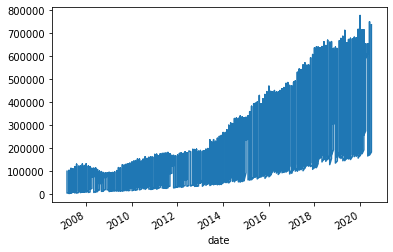

In [22]:
orders_dff.portfolio_value.plot()
